# Experiment 4: Linear Regression

#### Name: Nachiket Sankhe
#### UID: 2019120053
#### Class: BE EXTC

Dataset Description: Given dataset is a climate change dataset which contains the yearly data of the amount of various gases and substances in the air and the temperature. Our task is to find out the correlation of all variables and build a linear regression model.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
def get_corr_coef(data, col):
  for i in data.columns:
    if(i != col):
      r = np.corrcoef(data[col], data[i])
      print("The correlation coefficient of {} and {} is {}".format(col, i, r[1][0]))

Custom function to calculate and print correlation coefficients of a variable with all other variables in a dataframe.

In [ ]:
data = pd.read_csv("climate_change.csv")
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


Importing the dataset and understanding the variables present.

### Data Preprocessing

In [ ]:
#finding inter quartile range to remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

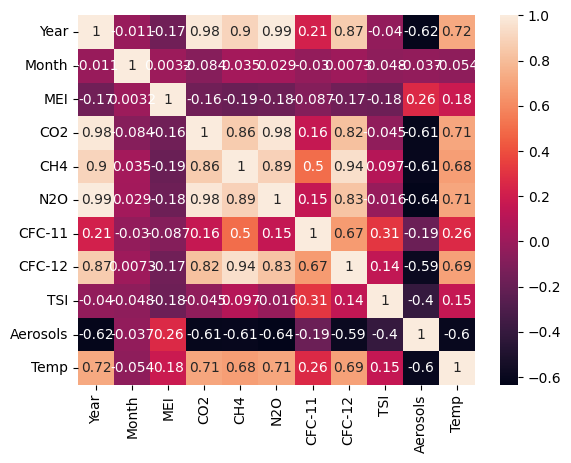

In [ ]:
sns.heatmap(data.corr(), annot=True);

The heatmap shows that CO2, CH4, N2O and CFC-12 are highly correlated with temperature.

In [ ]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
x = data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols']]
y = data[['Temp']]
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     69.11
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           2.36e-57
Time:                        16:20:30   Log-Likelihood:                 251.36
No. Observations:                 243   AIC:                            -484.7
Df Residuals:                     234   BIC:                            -453.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.8378     23.736     -2.563      0.0

Attributes with p-values less than 0.05 are MEI, CFC-12, TSI and Aerosols.

In [ ]:
train_data = data[data.iloc[:,0]<=2006]
train_data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
29,1985,10,-0.140,343.08,1681.56,305.395,215.327,390.676,1365.5269,0.0101,-0.008
30,1985,11,-0.050,344.40,1680.68,305.530,216.282,392.714,1365.6289,0.0097,-0.093
31,1985,12,-0.293,345.82,1677.99,305.653,217.326,394.539,1365.6794,0.0122,-0.002
32,1986,1,-0.307,346.54,1675.82,305.775,218.382,396.082,1365.6746,0.0146,0.121
33,1986,2,-0.191,347.13,1666.83,305.911,219.379,397.345,1365.5475,0.0158,0.065


Creating a training data dataframe by selecting data upto 2006.

In [ ]:
test_data = data[data.iloc[:,0]>2006]  
test_data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
284,2007,1,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,0.601
285,2007,2,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,0.498
286,2007,3,0.074,384.56,1803.10,320.548,247.997,538.811,1365.7544,0.0045,0.435
287,2007,4,-0.049,386.40,1802.11,320.518,247.574,538.586,1365.7228,0.0045,0.466
288,2007,5,0.183,386.58,1795.65,320.445,247.224,538.130,1365.6932,0.0041,0.372


Creating a testing data dataframe by selecting data after 2006.

In [ ]:
x = data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y = data['Temp']

In [ ]:
x_train = train_data[['MEI','CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y_train = train_data['Temp']
x_test = test_data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11',  'CFC-12', 'TSI', 'Aerosols']]
y_test = test_data['Temp']

Separating the variables and target into two dataframes.

In [ ]:
X2_train = sm.add_constant(x_train)
est_train = sm.OLS(y_train, X2_train)
est2 = est_train.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     68.15
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.37e-54
Time:                        16:20:30   Log-Likelihood:                 229.49
No. Observations:                 219   AIC:                            -441.0
Df Residuals:                     210   BIC:                            -410.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.0320     24.469     -2.086      0.0

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()  
clf.fit(x_train, y_train)

LinearRegression()

Creating a Linear Regression model using the Scikit-Learn API

In [ ]:
print("Intercept: ", clf.intercept_)
print("Coefficients:")
list(zip(x_train, clf.coef_))

Intercept:  -51.03196915985813
Coefficients:


[('MEI', 0.0622356977730238),
 ('CO2', 0.004960698794040838),
 ('CH4', -0.00038810727802360886),
 ('N2O', 0.001826241931154713),
 ('CFC-11', -0.001134499328455555),
 ('CFC-12', 0.00140132770320733),
 ('TSI', 0.03604734063953123),
 ('Aerosols', -8.435947559286046)]

Printing the y-intercept of the best fit line and the regression coefficients of all variables.

In [ ]:
y_pred= clf.predict(x_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [0.47395865 0.4503635  0.43347525 0.43430288 0.45407379 0.42558192
 0.4256269  0.40086034 0.34299562 0.34452906 0.34506256 0.3546125
 0.37297068 0.35481019 0.34472978 0.3962589  0.43969896 0.46681556
 0.45350739 0.42400764 0.38408517 0.36584435 0.38171572 0.3874683 ]


Printing the predictions from the model.

In [ ]:
clf_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
clf_diff.head()

,Actual value,Predicted value
284,0.601,0.473959
285,0.498,0.450364
286,0.435,0.433475
287,0.466,0.434303
288,0.372,0.454074


Creating a dataframe with the actual and predicted values and displaying them.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
meanAbErr = mean_absolute_error(y_test, y_pred)
meanSqErr = mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(meanSqErr)
print('R squared: {:.2f}'.format(clf.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 69.69
Mean Absolute Error: 0.0788135826026659
Mean Square Error: 0.010625956456136834
Root Mean Square Error: 0.10308228002977443


In [ ]:
get_corr_coef(data= train_data, col='N2O')

The correlation coefficient of N2O and Year is 0.9929762349866345
The correlation coefficient of N2O and Month is 0.031195858034826104
The correlation coefficient of N2O and MEI is -0.06177124908370094
The correlation coefficient of N2O and CO2 is 0.9749926361365616
The correlation coefficient of N2O and CH4 is 0.8903124993701754
The correlation coefficient of N2O and CFC-11 is 0.32738915672104657
The correlation coefficient of N2O and CFC-12 is 0.8645200386566593
The correlation coefficient of N2O and TSI is 0.15958759016062257
The correlation coefficient of N2O and Aerosols is -0.6609381809526802
The correlation coefficient of N2O and Temp is 0.7707514627632467


Printing correlation coefficient of N2O with all other variables.

In [ ]:
get_corr_coef(data= train_data, col='CFC-11')

The correlation coefficient of CFC-11 and Year is 0.39066011285143837
The correlation coefficient of CFC-11 and Month is -0.027567549452848228
The correlation coefficient of CFC-11 and MEI is -0.16610201966431876
The correlation coefficient of CFC-11 and CO2 is 0.3415448214852587
The correlation coefficient of CFC-11 and CH4 is 0.6279137878980163
The correlation coefficient of CFC-11 and N2O is 0.32738915672104657
The correlation coefficient of CFC-11 and CFC-12 is 0.7493680735584558
The correlation coefficient of CFC-11 and TSI is 0.2571940874708529
The correlation coefficient of CFC-11 and Aerosols is -0.23054354377641412
The correlation coefficient of CFC-11 and Temp is 0.3095061888348851


Printing correlation coefficient of CFC-11 with all other variables.

### Training the model with N2O, MEI, TSI and Aerosols only

In [ ]:
x_train_1 = train_data[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_train_1 = train_data['Temp']
x_test_1 = test_data[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_test_1 = test_data['Temp']
x_1 = data[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_1 = data[['Temp']]

In [ ]:
X2_train_1 = sm.add_constant(x_train_1)
est_train_1 = sm.OLS(y_train_1, X2_train_1)
est2_1 = est_train_1.fit()
print(est2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           8.92e-56
Time:                        16:20:31   Log-Likelihood:                 223.51
No. Observations:                 219   AIC:                            -437.0
Df Residuals:                     214   BIC:                            -420.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.1366     23.146     -2.296      0.0

In [ ]:
clf = LinearRegression()
clf.fit(x_train_1, y_train_1)

LinearRegression()

In [ ]:
print("Intercept: ", clf.intercept_)
print("Coefficients:")
list(zip(x_1, clf.coef_))

Intercept:  -53.13657186298022
Coefficients:


[('MEI', 0.0605710056491394),
 ('N2O', 0.02174196466857027),
 ('TSI', 0.03415981688806211),
 ('Aerosols', -8.37144911641541)]

In [ ]:
y_pred_1= clf.predict(x_test_1)
print("Prediction for test set: {}".format(y_pred_1))

Prediction for test set: [0.4994973  0.47402556 0.45350238 0.44432044 0.4591232  0.42707112
 0.4311838  0.42411848 0.38135484 0.38933851 0.38846345 0.39489663
 0.4093001  0.38835418 0.3726421  0.41817244 0.45693594 0.48525866
 0.47434819 0.45574824 0.43001199 0.42539002 0.43910982 0.44125798]


In [ ]:
clf_diff_1 = pd.DataFrame({'Actual value': y_test_1, 'Predicted value': y_pred_1})
clf_diff_1.head()

,Actual value,Predicted value
284,0.601,0.499497
285,0.498,0.474026
286,0.435,0.453502
287,0.466,0.444320
288,0.372,0.459123


In [ ]:
meanAbErr = mean_absolute_error(y_test_1, y_pred_1)
meanSqErr = mean_squared_error(y_test_1, y_pred_1)
rootMeanSqErr = np.sqrt(meanSqErr)
print('R squared: {:.2f}'.format(clf.score(x_1,y_1)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 67.00
Mean Absolute Error: 0.09020686837753299
Mean Square Error: 0.01371761845998247
Root Mean Square Error: 0.1171222372565623


The R<sup>2</sup> value obtained is reduced to 67 from the previously obtained 69.69.

### Conclusion:
1. Variables with p-value less than 0.05 are MEI, CFC-12, TSI and Aerosols.
2. R<sup>2</sup> score for the model with all variables is 69.69.
3. N2O is correlated with CO2, CH4 and CFC-12 as their respective correlation coefficients are above 0.7.
4. CFC-11 is correlated with CFC-12 as their correlation coefficient is above 0.7.

Statements 4 and 5 justify statement III from the lab document.

5. In the model with only MEI, N2O, TSI and Aerosols:
    - Regression coefficient of N2O is 0.0217 as compared to 0.0018 in the previous model. This indicates the increased influence of N2O on this model.
    - The R<sup>2</sup> score for this model is 67, a decrease from the previous model.